In [10]:
import networkx as nx
import csv
import itertools
import matplotlib.pylab as plt

G = nx.Graph()

def cleanData(author):
    author = author.replace(')', '')
    author = author.replace('Inst\.', 'Institute')
    if (author):
        return author

with open('data.csv', 'r') as f:
    reader = csv.reader(f, delimiter=",")
    for row in reader:
        authors = row[3].split("&")
        if (len(authors) == 1):
            G.add_node(authors[0].strip())
        if (len(authors) > 1):
            authors = map(str.strip, authors)
            authors = map(cleanData, authors)
            edges = list(itertools.combinations(authors, 2))
            G.add_edges_from(edges)

nx.write_edgelist(G, 'edgelist.txt')

In [3]:
print nx.info(G)

Name: 
Type: Graph
Number of nodes: 3993
Number of edges: 7856
Average degree:   3.9349


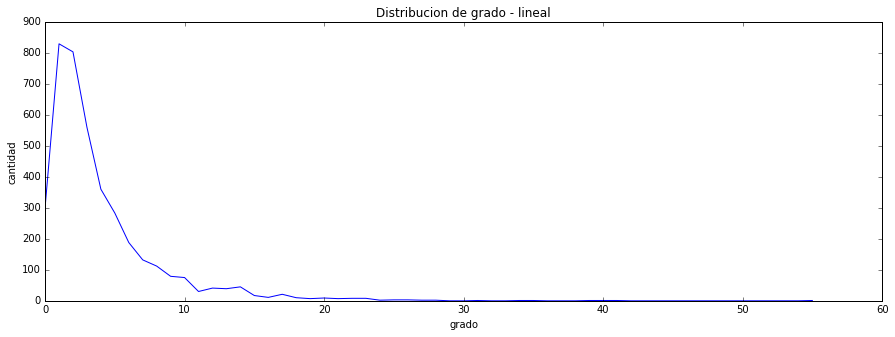

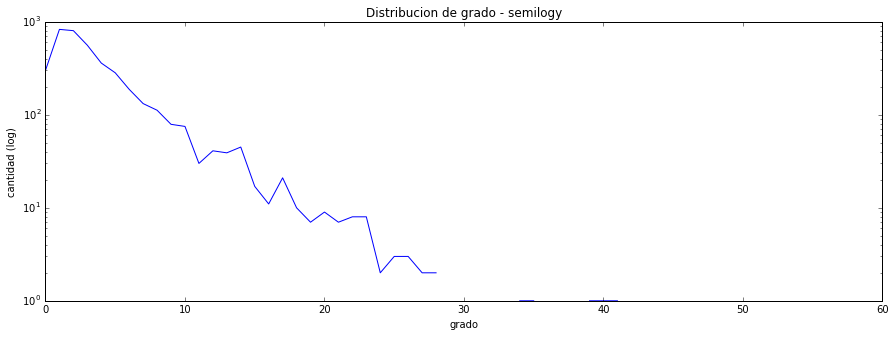

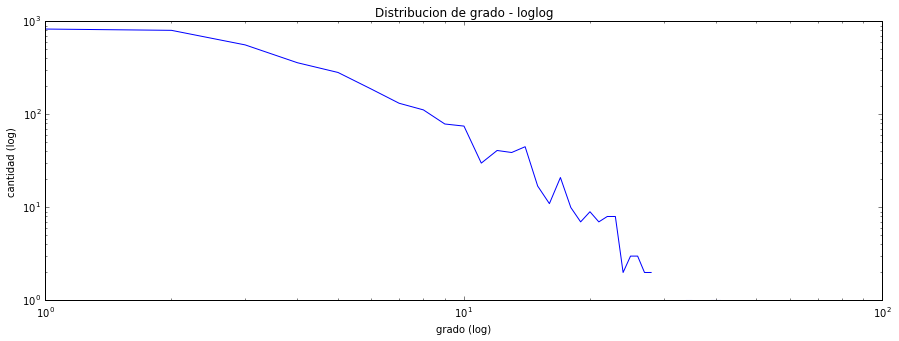

In [37]:
plt.figure(figsize=(15,5))
plt.title("Distribucion de grado - lineal")
plt.plot(nx.degree_histogram(G))
plt.xlabel("grado")
plt.ylabel("cantidad")
plt.show()

plt.figure(figsize=(15,5))
plt.title("Distribucion de grado - semilogy")
plt.semilogy(nx.degree_histogram(G))
plt.xlabel("grado")
plt.ylabel("cantidad (log)")
plt.show()

plt.figure(figsize=(15,5))
plt.title("Distribucion de grado - loglog")
plt.loglog(nx.degree_histogram(G))
plt.xlabel("grado (log)")
plt.ylabel("cantidad (log)")
plt.show()

In [4]:
print "Número de componentes conexas del grafo: %s" % nx.number_connected_components(G)
largest_cc = max(nx.connected_components(G), key=len)
print "Cantidad de nodos de la máxima componente: %s" % len(largest_cc)

Número de componentes conexas del grafo: 536
Cantidad de nodos de la máxima componente: 3013


In [42]:
from random import randint

def vecindades(G):
    # Elijo un nodo al azar del largest_cc
    # Itero sobre sus vecinos, acumulo: cantidad de nodos alcanzados, cantidad de nodos agregados
    # en funcion de la distancia al nodo inicial, es decir, en funcion del numero de iteracion
    # Hasta completar toda la componente (usar el tamano de la componente previamente calculado)
    # Como lidiar con los nodos repetidos?, usar un diccionario para contar solo los nodos nuevos alcanzados
    
    giant = max(nx.connected_component_subgraphs(G), key=len)
    nodes_from_the_giant_component = [n for n in giant.nodes()]    
    i = 0
    n_iter = 1
    seed_nodes_used = []
    nodos_vecinos_cantidades = []
    while (i < n_iter) : 

        aux = randint(0, len(nodes_from_the_giant_component)-1)
        seed_node = nodes_from_the_giant_component[aux]
        seed_nodes_used.append(seed_node)

        neighbors_nodes = G.neighbors(seed_node)
        c = 0
        for n in neighbors_nodes:
            c = int(c) + 1
        nodos_vecinos_cantidades.append(c)
        j = 0
        while (j < 10):
            neighbors_nodes = [node for node in G.neighbors(n)]
            nodos_vecinos_cantidades.append(len(neighbors_nodes))
            aux = randint(0, len(neighbors_nodes)-1)
            n = neighbors_nodes[aux]
        
        
            j = j + 1       
        
        i = i + 1
    
    return nodos_vecinos_cantidades

    
a = vecindades(G)

[2, 13, 20, 5, 8, 20, 12, 5, 8, 4, 38]


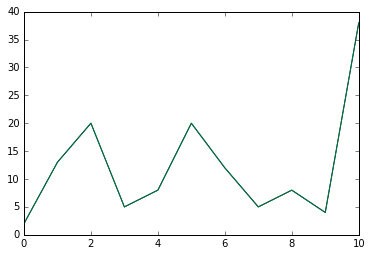

In [47]:
#graficar los nodos alcanzados a medida que nos alejamos del nodo semilla
plt.plot(a)
plt.show()

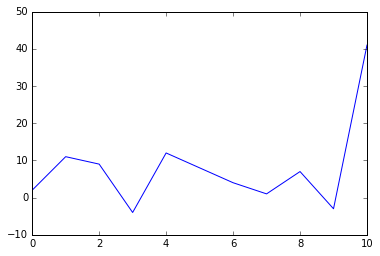

In [48]:
#graficamos la cantidad de nodos que se van agregandop a medida que nos alejamos 
acumulado = 0
b = []
for i in a : 
    acumulado = i - acumulado
    b.append(acumulado)

plt.plot(b)
plt.show()

In [51]:
import numpy as np
resultados = []
for i in xrange(0,10):
    resultados.append(np.array(vecindades(G)))
print resultados

[array([ 6, 13,  3, 13, 11,  3, 11,  5, 11,  3, 11]), array([ 8,  6, 14,  6, 14,  6,  3,  6,  5,  6,  8]), array([2, 7, 2, 7, 9, 5, 9, 9, 4, 4, 4]), array([ 2,  6,  4,  4, 12, 19,  4, 19,  3,  5,  3]), array([ 8,  6,  9,  7, 18, 10,  7, 15,  7, 15, 23]), array([ 5,  9,  8,  9,  5,  8, 10,  8,  7,  8,  7]), array([ 5, 26, 23,  8, 10, 16,  8,  6, 16,  1, 16]), array([3, 9, 1, 9, 2, 2, 9, 3, 9, 1, 9]), array([ 6,  6,  5,  6,  8,  5,  8, 10,  4, 10,  8]), array([ 9,  3, 15,  3, 15, 15, 15,  7, 15,  5, 15])]


In [55]:
resultados = np.array(resultados)
promedios_de_muchos_nodos_semillas =  np.mean(resultados,axis=0)

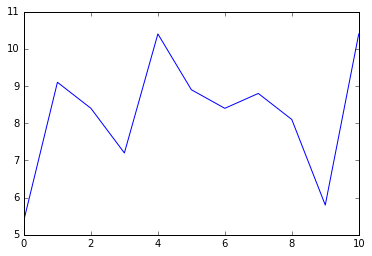

In [56]:
#graficar los nodos alcanzados a medida que nos alejamos del nodo semilla
plt.plot(promedios_de_muchos_nodos_semillas)
plt.show()

In [ ]:
#graficamos la cantidad de nodos que se van agregandop a medida que nos alejamos para
#los nodos semillas 
acumulado = 0
b = []
for i in promedios_de_muchos_nodos_semillas : 
    acumulado = i - acumulado
    b.append(acumulado)

plt.plot(b)
plt.show()

In [ ]:
# Graficar el grafo, si no se puede completo elegir un porcentaje de los nodos
# que mantengan la distribucion de grado del grafo original